In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
connection = mysql.connector.connect(
    host="localhost",
    database="shanaya",
    user="root",
    password="Pj@123456",
    port = '3306'
)
from datetime import datetime, timedelta

In [4]:
with connection.cursor() as cursor:
        cursor.execute("SELECT * FROM users_attendancerecord;")
        data = cursor.fetchall()
data

[(1,
  datetime.date(2024, 8, 22),
  datetime.timedelta(seconds=37613, microseconds=374920),
  datetime.timedelta(seconds=66663),
  'Present',
  13),
 (2,
  datetime.date(2024, 8, 22),
  datetime.timedelta(seconds=63277),
  datetime.timedelta(seconds=63306),
  'Present',
  12),
 (3,
  datetime.date(2024, 8, 22),
  datetime.timedelta(seconds=64164),
  datetime.timedelta(seconds=64409),
  'Present',
  11),
 (4,
  datetime.date(2024, 8, 23),
  datetime.timedelta(seconds=32166),
  datetime.timedelta(seconds=53529),
  'Present',
  13),
 (5,
  datetime.date(2024, 8, 23),
  datetime.timedelta(seconds=52100),
  datetime.timedelta(seconds=52713),
  'Present',
  11),
 (6,
  datetime.date(2024, 8, 21),
  datetime.timedelta(seconds=32400),
  datetime.timedelta(seconds=61200),
  'Present',
  11),
 (7,
  datetime.date(2024, 8, 20),
  datetime.timedelta(seconds=34200),
  datetime.timedelta(seconds=60300),
  'Late',
  11),
 (8, datetime.date(2024, 8, 19), None, None, 'Absent', 11),
 (9,
  datetime.dat

In [5]:
df = pd.DataFrame(data, columns=['ID', 'Date', 'Start Time', 'End Time', 'Status', 'User ID'])

# Function to convert timedelta to hours, minutes, seconds
def timedelta_to_str(td):
    if pd.isna(td) or td is None:
        return None
    total_seconds = int(td.total_seconds())
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60
    return f"{hours:02}:{minutes:02}:{seconds:02}"

# Apply the function to 'Start Time' and 'End Time'
# df['Start Time'] = df['Start Time'].apply(timedelta_to_str)
# df['End Time'] = df['End Time'].apply(timedelta_to_str)

# Display the DataFrame
df

,ID,Date,Start Time,End Time,Status,User ID
0,1,2024-08-22,0 days 10:26:53.374920,0 days 18:31:03,Present,13
1,2,2024-08-22,0 days 17:34:37,0 days 17:35:06,Present,12
2,3,2024-08-22,0 days 17:49:24,0 days 17:53:29,Present,11
3,4,2024-08-23,0 days 08:56:06,0 days 14:52:09,Present,13
4,5,2024-08-23,0 days 14:28:20,0 days 14:38:33,Present,11
5,6,2024-08-21,0 days 09:00:00,0 days 17:00:00,Present,11
6,7,2024-08-20,0 days 09:30:00,0 days 16:45:00,Late,11
7,8,2024-08-19,NaT,NaT,Absent,11
8,9,2024-08-21,0 days 08:45:00,0 days 17:10:00,Present,12
9,10,2024-08-20,0 days 10:15:00,0 days 18:00:00,Late,12


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [7]:
df.Date.dtype

dtype('<M8[ns]')

In [8]:
new_date = df['Date'][0]+pd.Timedelta(days = 6)
print(new_date)

2024-08-28 00:00:00


2024-08-27 00:00:00
2024-08-21 00:00:00


<Figure size 640x480 with 0 Axes>

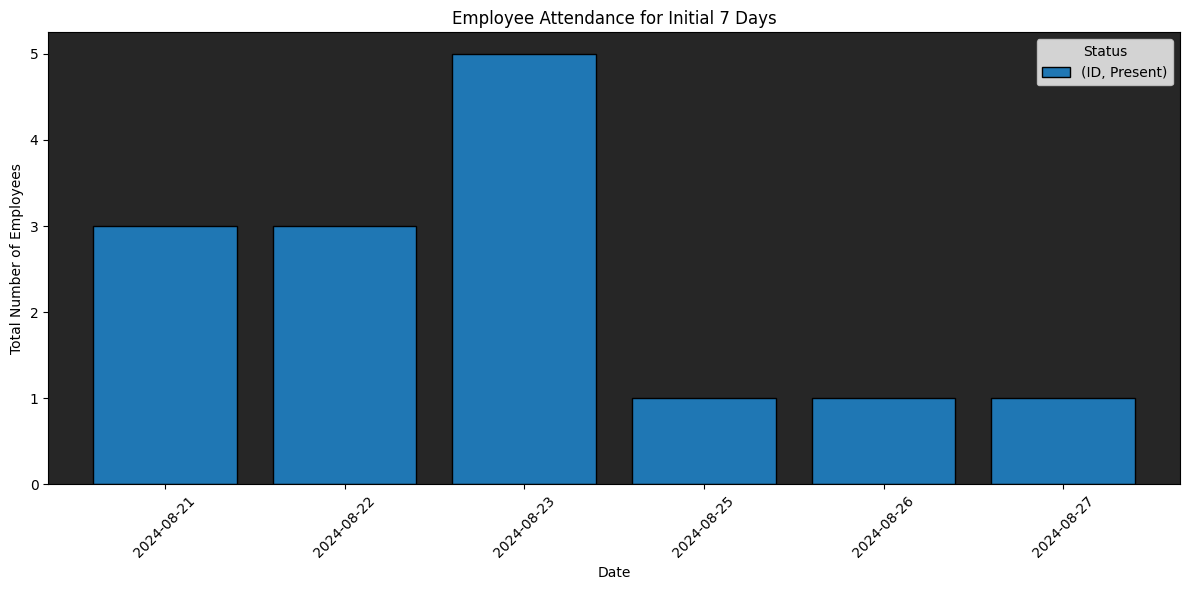

In [21]:
start_date = df['Date'].max()
print(start_date)
end_date = start_date + pd.Timedelta(days = -6)
print(end_date)
week = df[(df['Date']<=start_date) & (df['Date']>=end_date)]
week
# wd = week.groupby((['Date','Status'])).count()['Date','Status','ID']
wd = week.groupby(['Date', 'Status'])[['ID']].count().unstack(fill_value=0)
wd
plt.gcf().set_facecolor('#262626')

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('#262626')
wd.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c'], width=0.8, edgecolor='black')
ax.set_xlabel('Date')
ax.set_ylabel('Total Number of Employees')
ax.set_title('Employee Attendance for Initial 7 Days')
ax.set_xticklabels(wd.index.strftime('%Y-%m-%d'), rotation=45)
ax.legend(title='Status')
plt.tight_layout()




In [15]:
week[(week['Status'] == 'Absent')]

,ID,Date,Start Time,End Time,Status,User ID


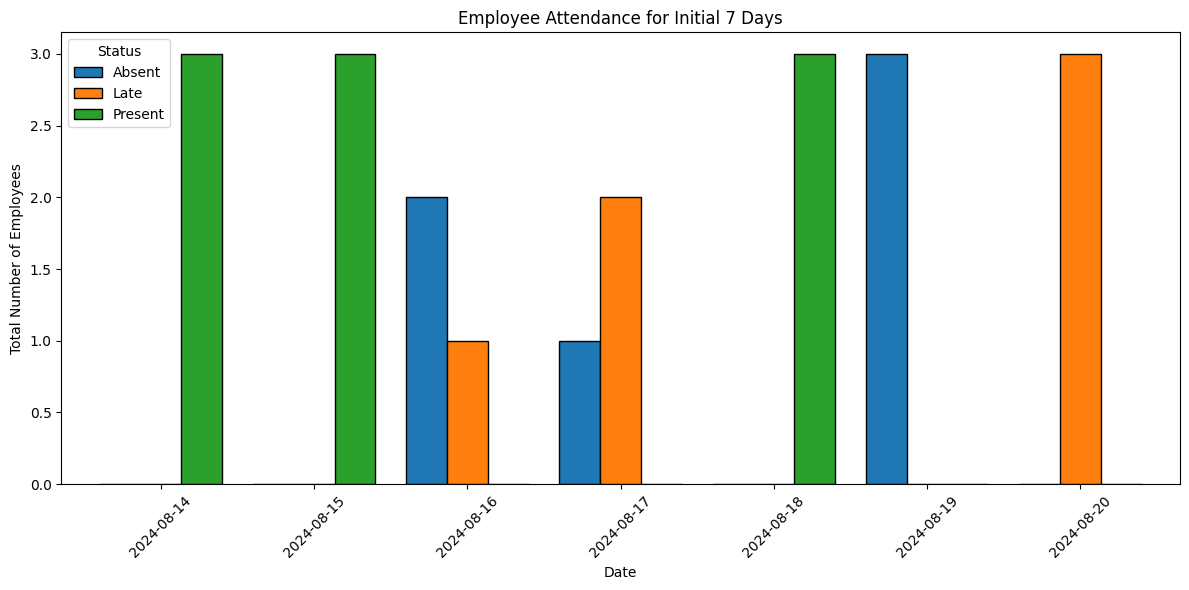

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the initial 7 days
start_date = df['Date'].min()
end_date = start_date + pd.Timedelta(days=6)
df_initial_7_days = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Count the number of Present, Absent, and Late for each day
attendance_counts = df_initial_7_days.groupby(['Date', 'Status']).size().unstack(fill_value=0)

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each status with a different color
attendance_counts.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c'], width=0.8, edgecolor='black')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Total Number of Employees')
ax.set_title('Employee Attendance for Initial 7 Days')
ax.set_xticklabels(attendance_counts.index.strftime('%Y-%m-%d'), rotation=45)
ax.legend(title='Status')

plt.tight_layout()
plt.show()
    

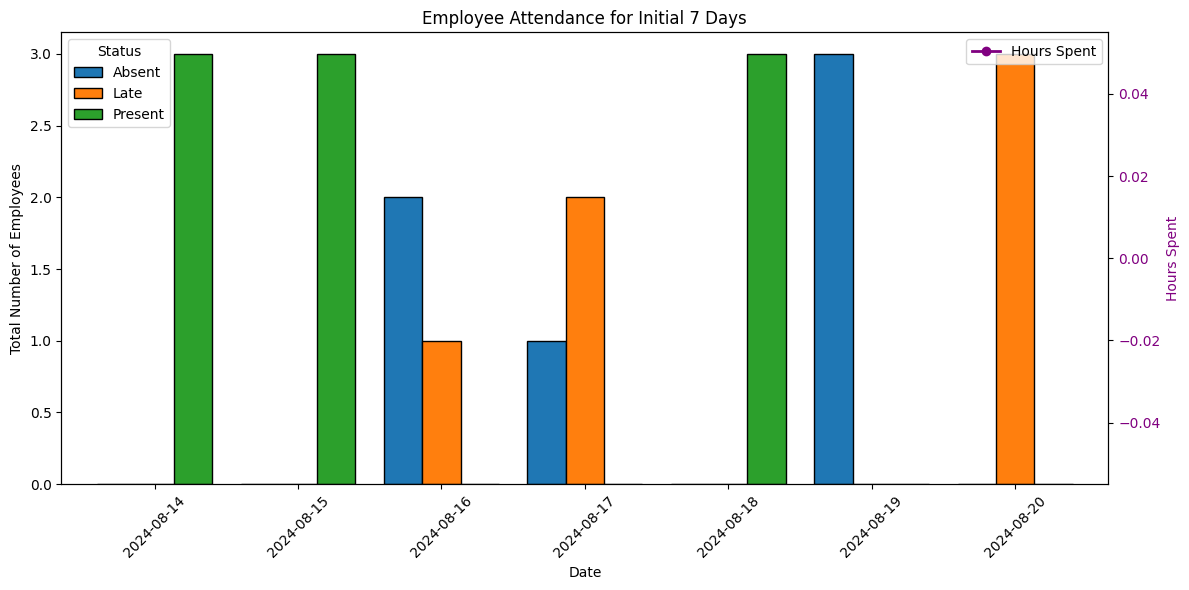

In [12]:
df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')
df['End Time'] = pd.to_datetime(df['End Time'], errors='coerce')
df['Duration'] = (df['End Time'] - df['Start Time']).dt.total_seconds() / 3600
df['Duration'].fillna(0, inplace=True)  # Replace NaN with 0 for absents
daily_duration = df.groupby('Date')['Duration'].sum()

# Filter data for the initial 7 days
start_date = df['Date'].min()
end_date = start_date + pd.Timedelta(days=6)
df_initial_7_days = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Count the number of Present, Absent, and Late for each day
attendance_counts = df_initial_7_days.groupby(['Date', 'Status']).size().unstack(fill_value=0)

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each status with a different color
attendance_counts.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c'], width=0.8, edgecolor='black')

# Plot KDI lines
kdi_values = daily_duration[start_date:end_date]
ax2 = ax.twinx()  # Create a secondary y-axis
ax2.plot(kdi_values.index, kdi_values.values, color='purple', marker='o', linestyle='-', linewidth=2, label='Hours Spent')
ax2.set_ylabel('Hours Spent', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Total Number of Employees')
ax.set_title('Employee Attendance for Initial 7 Days')
ax.set_xticklabels(attendance_counts.index.strftime('%Y-%m-%d'), rotation=45)
ax.legend(title='Status')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [66]:
import pandas as pd

data = {
    'ID': range(32),
    'Date': [
        '2024-08-22', '2024-08-22', '2024-08-22', '2024-08-23', '2024-08-23', '2024-08-21', '2024-08-20', '2024-08-19',
        '2024-08-21', '2024-08-20', '2024-08-19', '2024-08-21', '2024-08-20', '2024-08-19', '2024-08-18', '2024-08-17',
        '2024-08-16', '2024-08-15', '2024-08-14', '2024-08-18', '2024-08-17', '2024-08-16', '2024-08-15', '2024-08-14',
        '2024-08-18', '2024-08-17', '2024-08-16', '2024-08-15', '2024-08-14', '2024-08-23', '2024-08-23', '2024-08-23'
    ],
    'Start Time': [
        '10:26:53', '17:34:37', '17:49:24', '08:56:06', '14:28:20', '09:00:00', '09:30:00', 'None', '08:45:00', '10:15:00',
        'None', '09:10:00', '09:50:00', 'None', '09:05:00', 'None', '09:20:00', '09:00:00', '08:50:00', '09:10:00',
        '09:25:00', 'None', '08:45:00', '09:00:00', '08:55:00', '09:30:00', 'None', '09:05:00', '08:50:00', '14:52:42',
        '14:53:30', '15:44:29'
    ],
    'End Time': [
        '18:31:03', '17:35:06', '17:53:29', '14:52:09', '14:38:33', '17:00:00', '16:45:00', 'None', '17:10:00', '18:00:00',
        'None', '17:05:00', '18:30:00', 'None', '17:15:00', 'None', '17:00:00', '16:30:00', '17:00:00', '17:20:00',
        '17:10:00', 'None', '16:50:00', '17:05:00', '17:10:00', '17:20:00', 'None', '16:45:00', '17:15:00', '14:53:15',
        'None', '15:55:00'
    ],
    'Status': [
        'Present', 'Present', 'Present', 'Present', 'Present', 'Present', 'Late', 'Absent', 'Present', 'Late',
        'Absent', 'Present', 'Late', 'Absent', 'Present', 'Absent', 'Late', 'Present', 'Present', 'Present',
        'Late', 'Absent', 'Present', 'Present', 'Present', 'Late', 'Absent', 'Present', 'Present', 'Present',
        'Present', 'Present'
    ],
    'User ID': [
        13, 12, 11, 13, 11, 11, 11, 11, 12, 12,
        12, 13, 13, 13, 11, 11, 11, 11, 12, 12,
        12, 12, 13, 13, 13, 13, 13, 13, 13, 14,
        12, 15
    ]
}

df = pd.DataFrame(data)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Start Time' and 'End Time' to datetime format, replacing 'None' with NaT
df['Start Time'] = pd.to_datetime(df['Start Time'], format='%H:%M:%S', errors='coerce').dt.time
df['End Time'] = pd.to_datetime(df['End Time'], format='%H:%M:%S', errors='coerce').dt.time

df

,ID,Date,Start Time,End Time,Status,User ID
0,0,2024-08-22,10:26:53,18:31:03,Present,13
1,1,2024-08-22,17:34:37,17:35:06,Present,12
2,2,2024-08-22,17:49:24,17:53:29,Present,11
3,3,2024-08-23,08:56:06,14:52:09,Present,13
4,4,2024-08-23,14:28:20,14:38:33,Present,11
5,5,2024-08-21,09:00:00,17:00:00,Present,11
6,6,2024-08-20,09:30:00,16:45:00,Late,11
7,7,2024-08-19,NaT,NaT,Absent,11
8,8,2024-08-21,08:45:00,17:10:00,Present,12
9,9,2024-08-20,10:15:00,18:00:00,Late,12
